In [150]:
import json
import os
from pathlib import Path
from typing import Tuple

import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from pandas import json_normalize

sns.set(font_scale=2)
sns.set_theme(style="ticks", palette="pastel")

def boxplot(df: pd.DataFrame, x="method", hue="study", title=""):
    sns.set_theme(style="ticks", palette="pastel")
    sns.boxplot(x=x, y="accuracy", hue=hue, palette=["m", "g"], data=df).set(
        title=title
    )
    sns.despine(trim=True)


def load_dataset(path) -> Tuple[pd.DataFrame, pd.DataFrame]:
    voice_dfs = None
    tremor_dfs = None

    def parse_json(x: str):
        if pd.isna(x) or not x.strip():
            return {}
        return json.loads(x)

    def load_params(df: pd.DataFrame) -> pd.DataFrame:
        params = df["params"].apply(parse_json)
        parsed_params = json_normalize(params)
        return df.merge(parsed_params, left_index=True, right_index=True).drop(columns=["params"])

    for folder in os.listdir(path):
        for idx, file in enumerate(os.listdir(path / folder)):
            df = pd.read_csv(
                path / folder / file
            )
            df["run"] = folder.split("_")[1]
            df.columns = [c.strip() for c in df.columns]
            if idx == 0:
                tremor_dfs = (
                    pd.concat([tremor_dfs, df]) if tremor_dfs is not None else df
                )
            else:
                voice_dfs = pd.concat([voice_dfs, df]) if voice_dfs is not None else df
    return load_params(voice_dfs), load_params(tremor_dfs)


def main():
    path = Path("results/03-08-2023_00-33-32")
    voice_dfs, tremor_dfs = load_dataset(path)
    # PLOT BOXES
    # sns.relplot(data=df, x="method", y="accuracy", hue="study")

In [117]:
path = Path("results/03-08-2023_00-33-32")
voice_dfs, tremor_dfs = load_dataset(path)

<AxesSubplot: xlabel='accuracy', ylabel='Density'>

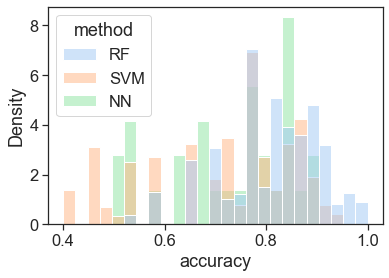

In [272]:
sns.set_theme(palette="pastel", style='ticks', context='notebook', font_scale=1.5)
#sns.catplot(voice_dfs, kind='strip', x="accuracy", hue="method")
# sns.kdeplot(data=voice_dfs, x="accuracy", cbar=True, common_grid=True, common_norm=False, )
sns.histplot(data=voice_dfs, x="accuracy", hue="method", stat='density', common_norm=False)
#sns.kdeplot(data=voice_dfs, x="accuracy", hue='method', common_grid=True, common_norm=False, )

In [132]:
voice_dfs.describe()

,accuracy,loss,n_estimators,degree,tol
count,1890.000000,30.000000,900.000000,960.000000,960.00000
mean,0.760379,0.463018,200.000000,3.500000,0.00055
std,0.130423,0.125864,70.749995,1.118617,0.00045
min,0.400000,0.285877,100.000000,2.000000,0.00010
25%,0.705882,0.334603,150.000000,2.750000,0.00010
50%,0.783333,0.475194,200.000000,3.500000,0.00055
75%,0.857143,0.510226,250.000000,4.250000,0.00100
max,1.000000,0.693297,300.000000,5.000000,0.00100


In [240]:
counts = {}
for col in voice_dfs["method"].unique():
    counts[col] = len(voice_dfs[voice_dfs["method"] == col])

voice_dfs["count"] = voice_dfs["method"].map(lambda x: 1 / counts[x])
voice_dfs

,study,method,accuracy,loss,run,n_estimators,criterion,max_features,kernel,degree,tol,count
0,study1,RF,0.764706,NaN,2,100.0,gini,log2,NaN,NaN,NaN,0.001111
0,study1,RF,0.882353,NaN,5,100.0,gini,log2,NaN,NaN,NaN,0.001111
0,study1,RF,0.705882,NaN,4,100.0,gini,log2,NaN,NaN,NaN,0.001111
0,study1,RF,0.882353,NaN,3,100.0,gini,log2,NaN,NaN,NaN,0.001111
0,study1,RF,0.823529,NaN,6,100.0,gini,log2,NaN,NaN,NaN,0.001111
...,...,...,...,...,...,...,...,...,...,...,...,...
188,study3,NN,0.840278,0.320004,1,NaN,NaN,NaN,NaN,NaN,NaN,0.033333
188,study3,NN,0.840278,0.334244,8,NaN,NaN,NaN,NaN,NaN,NaN,0.033333
188,study3,NN,0.888889,0.318105,9,NaN,NaN,NaN,NaN,NaN,NaN,0.033333
188,study3,NN,0.902778,0.285877,0,NaN,NaN,NaN,NaN,NaN,NaN,0.033333
